In [2]:
import pandas as pd
import glob
import os
import re
import matplotlib.pyplot as plt

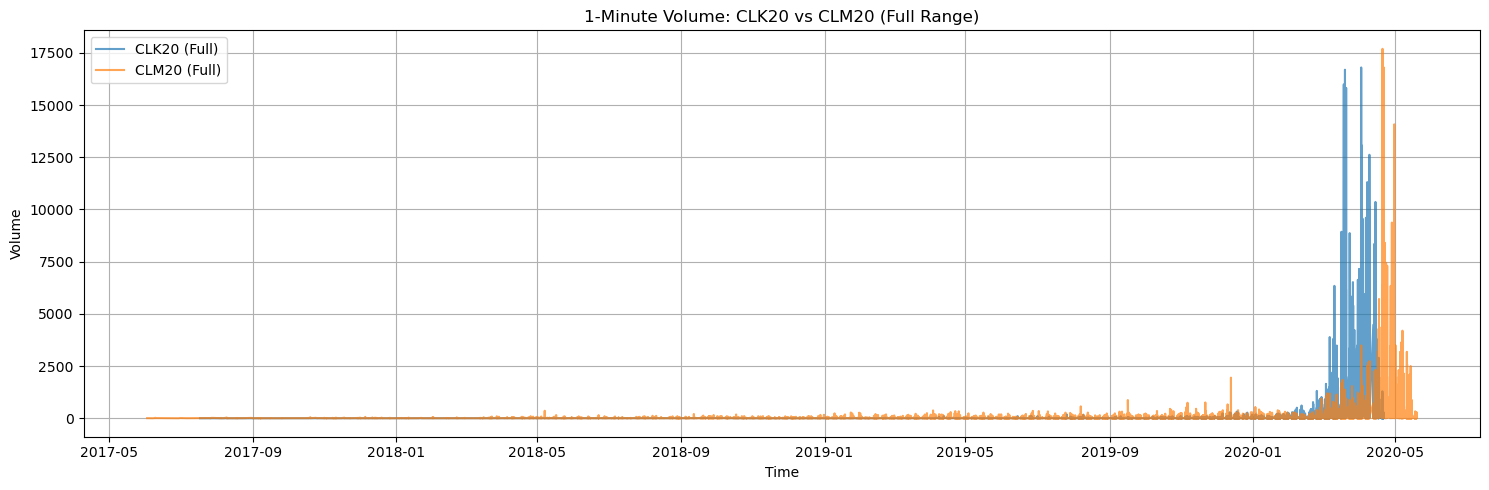

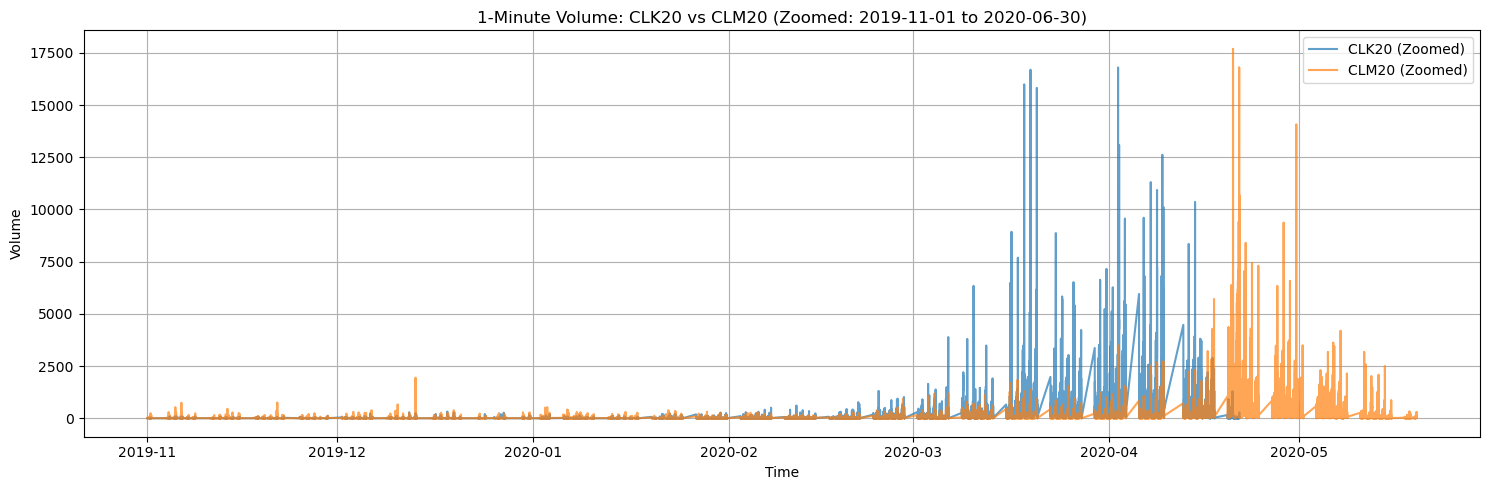

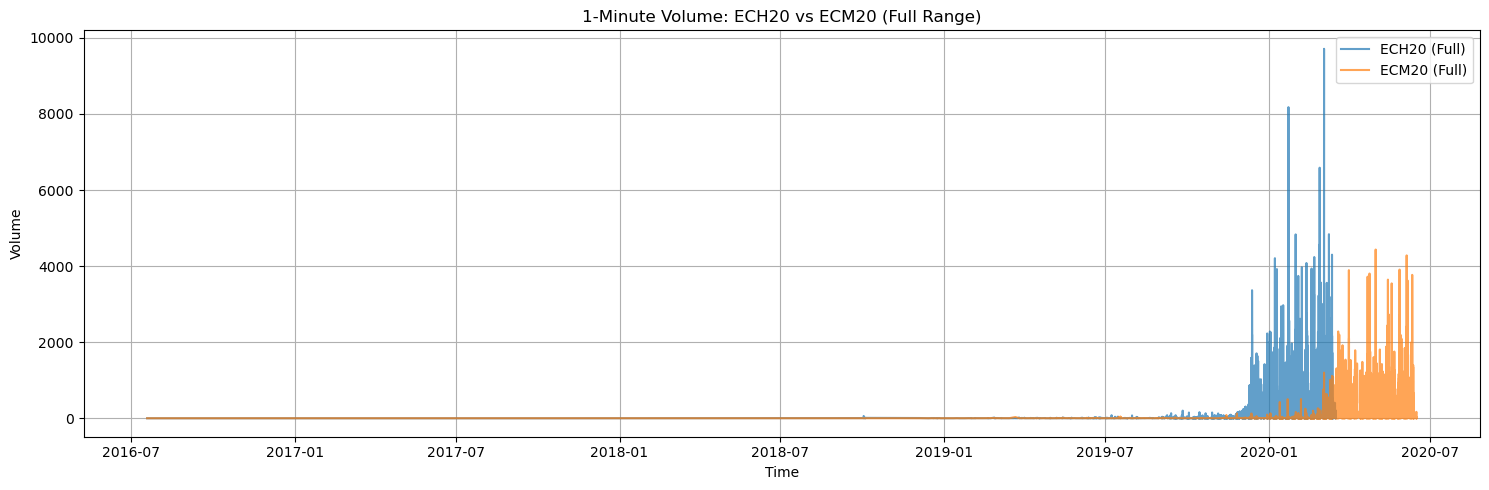

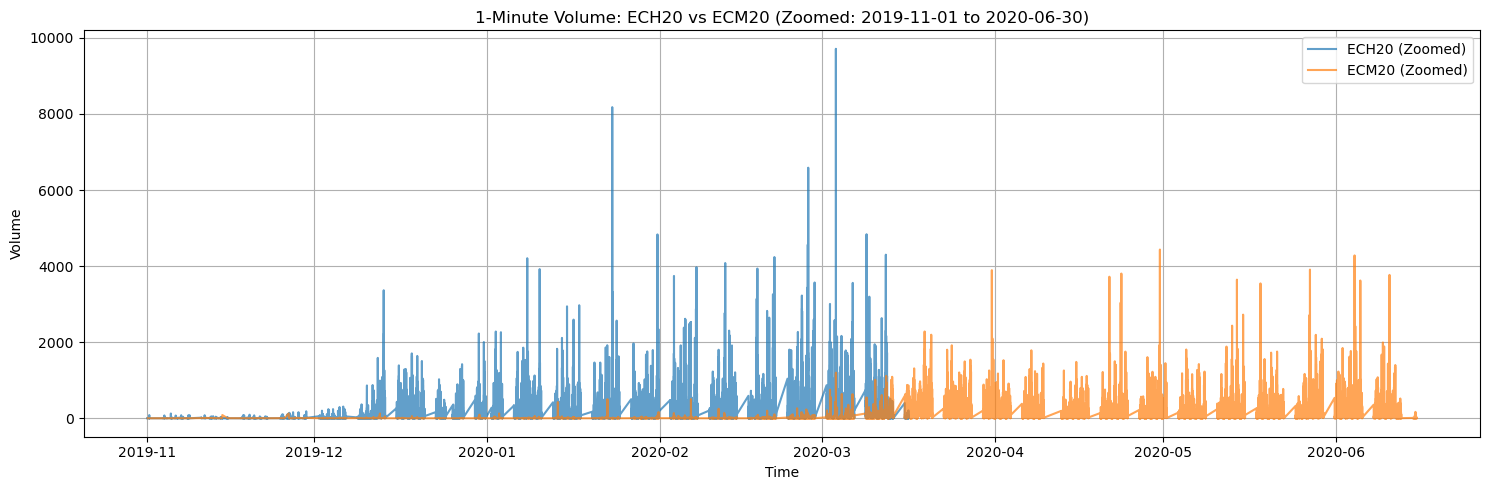

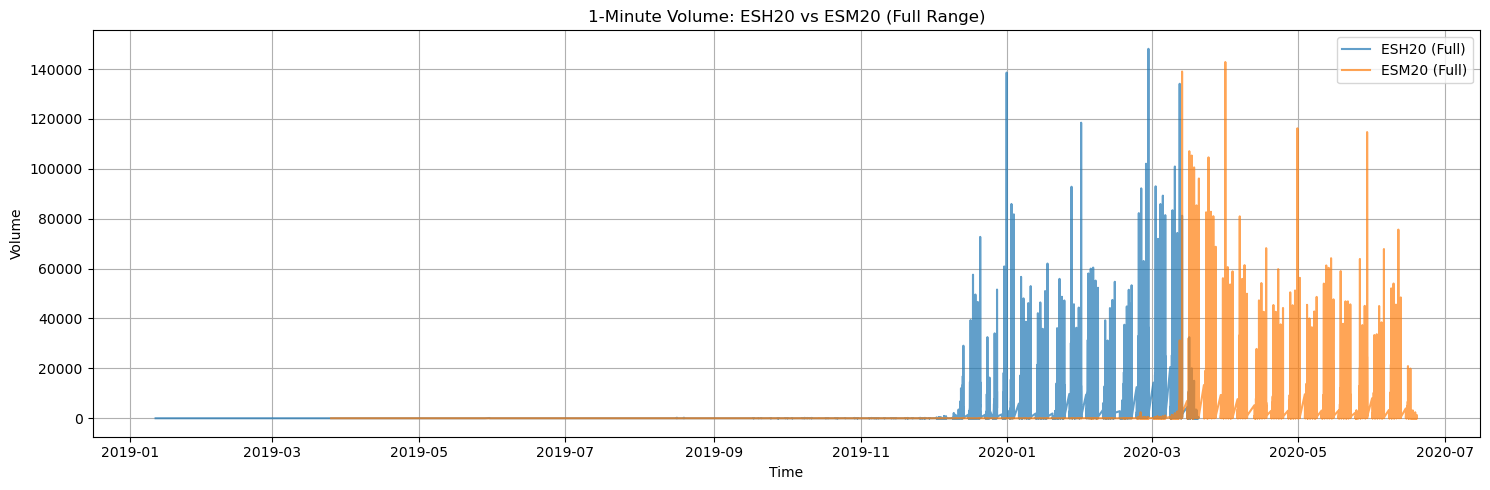

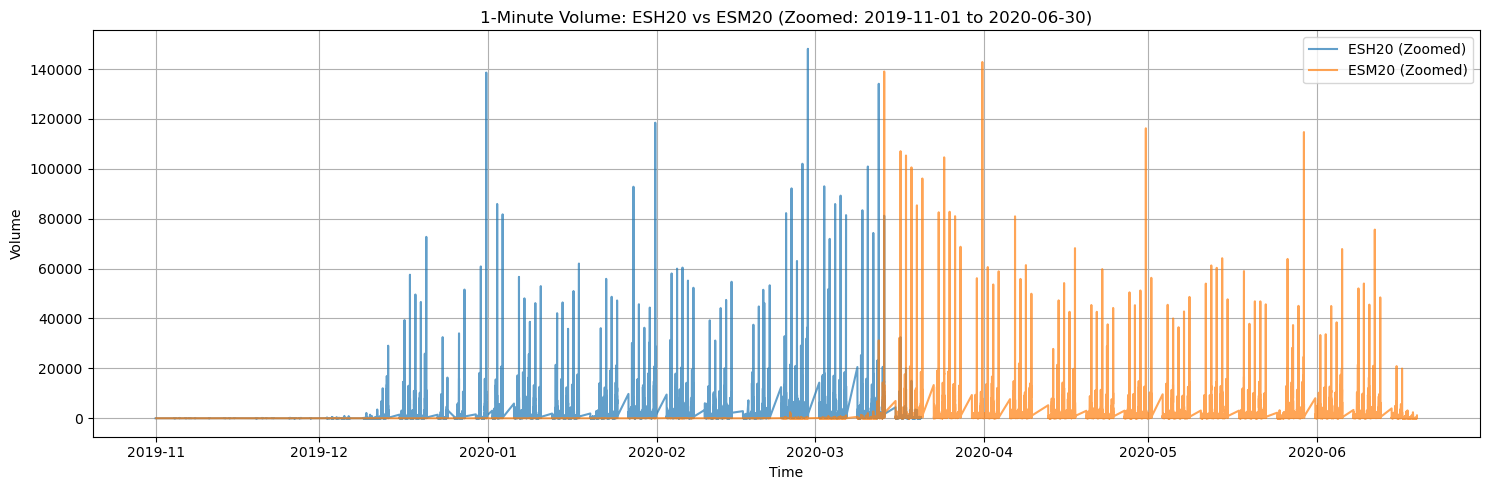

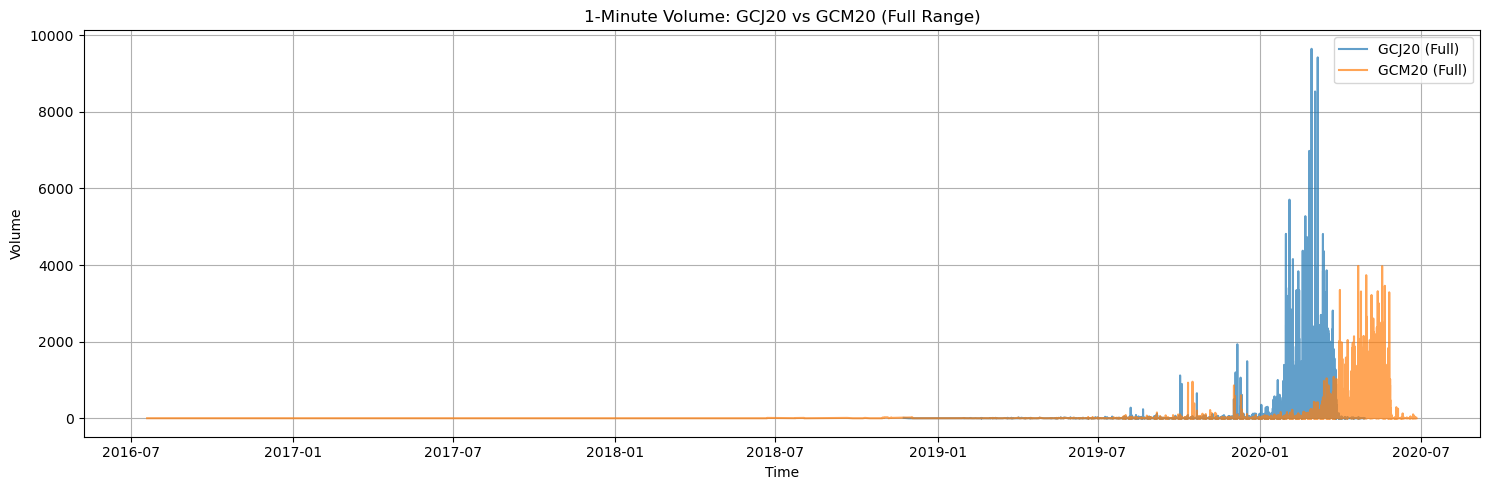

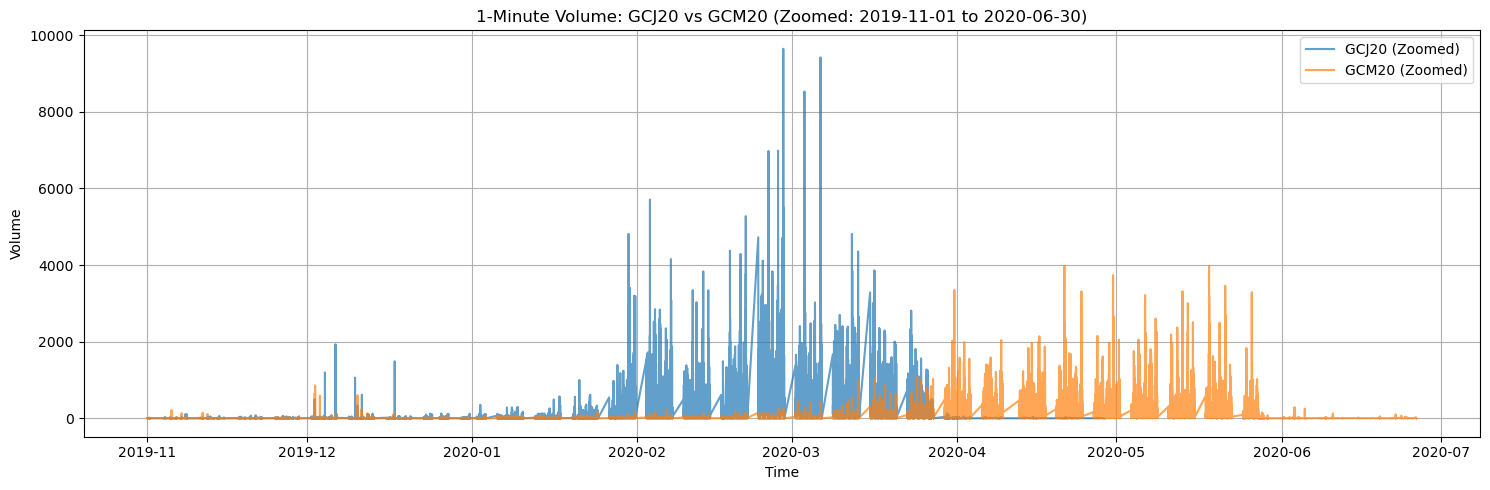

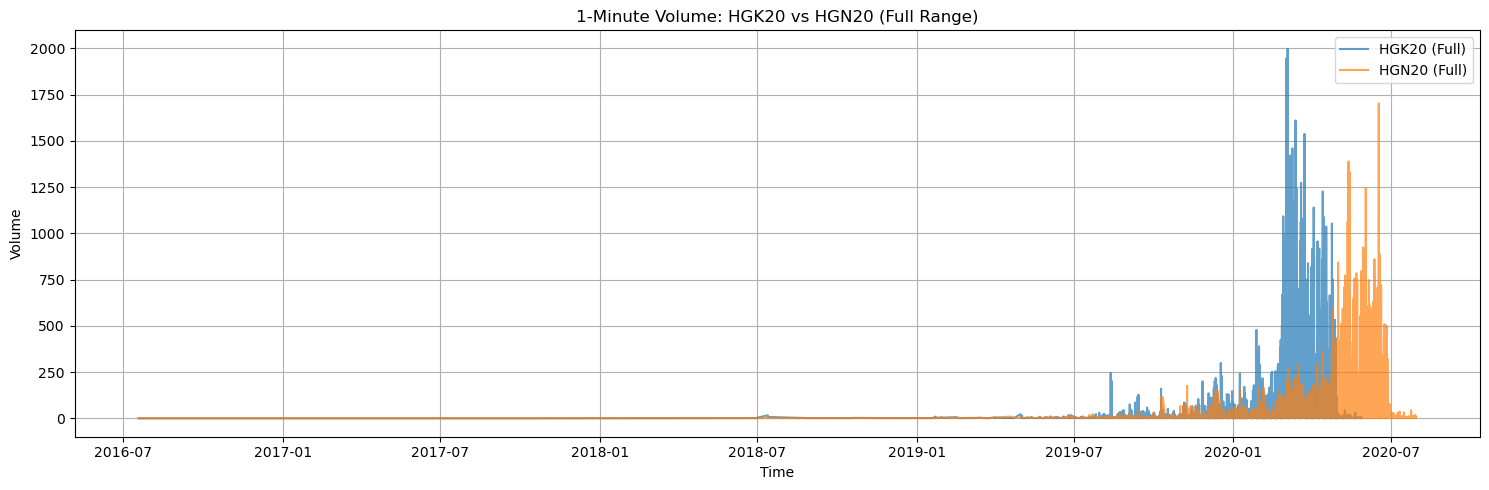

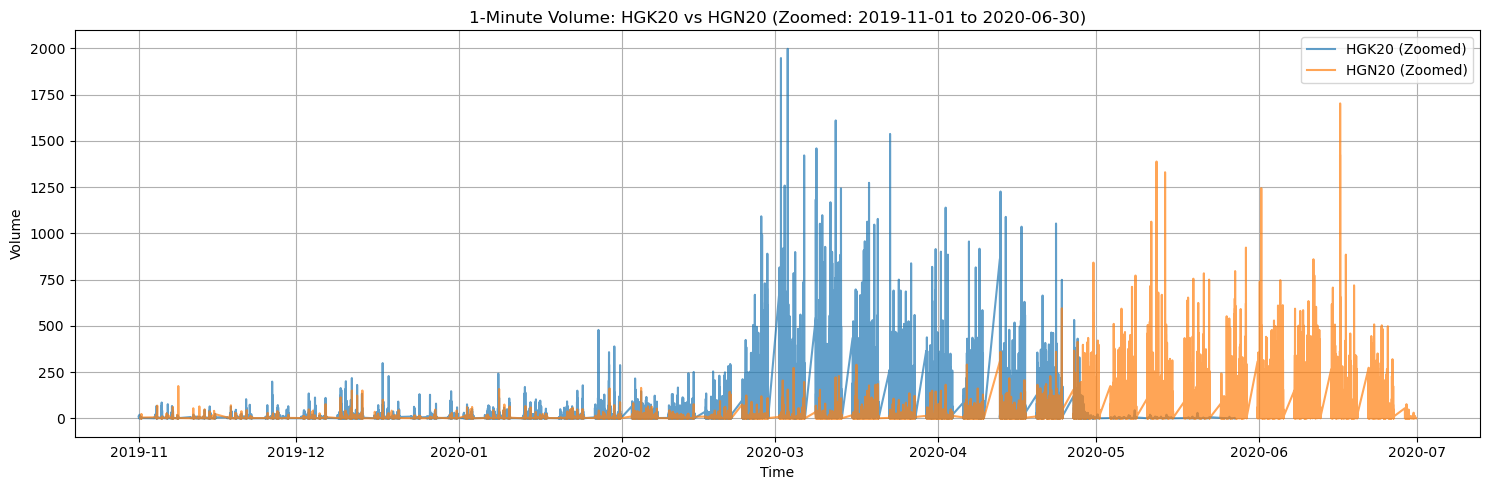

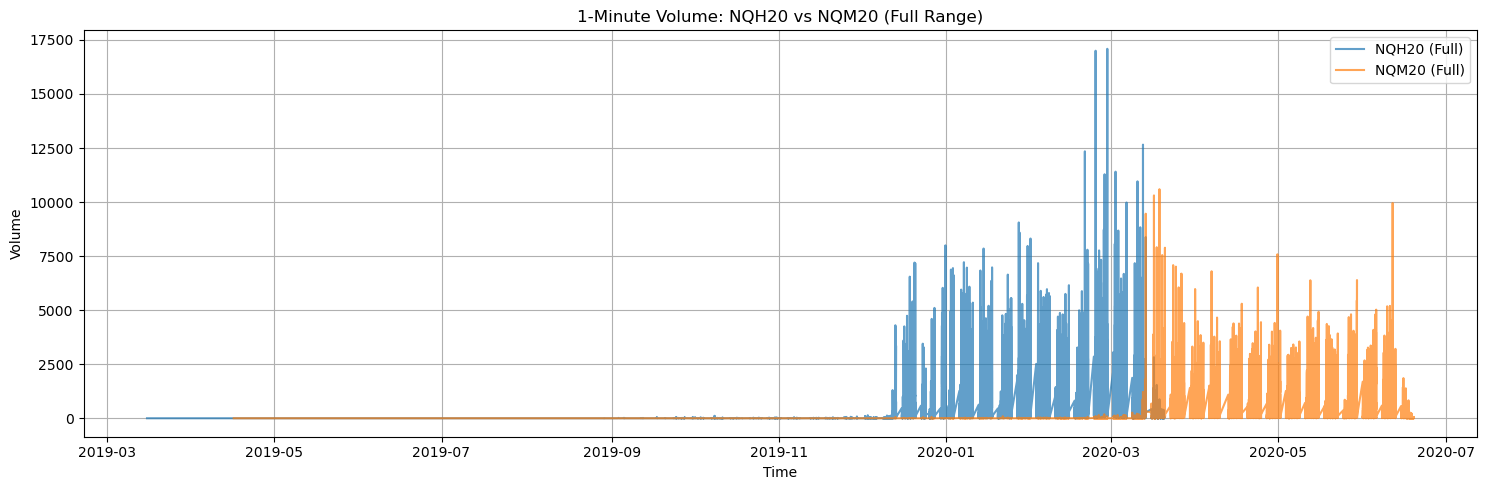

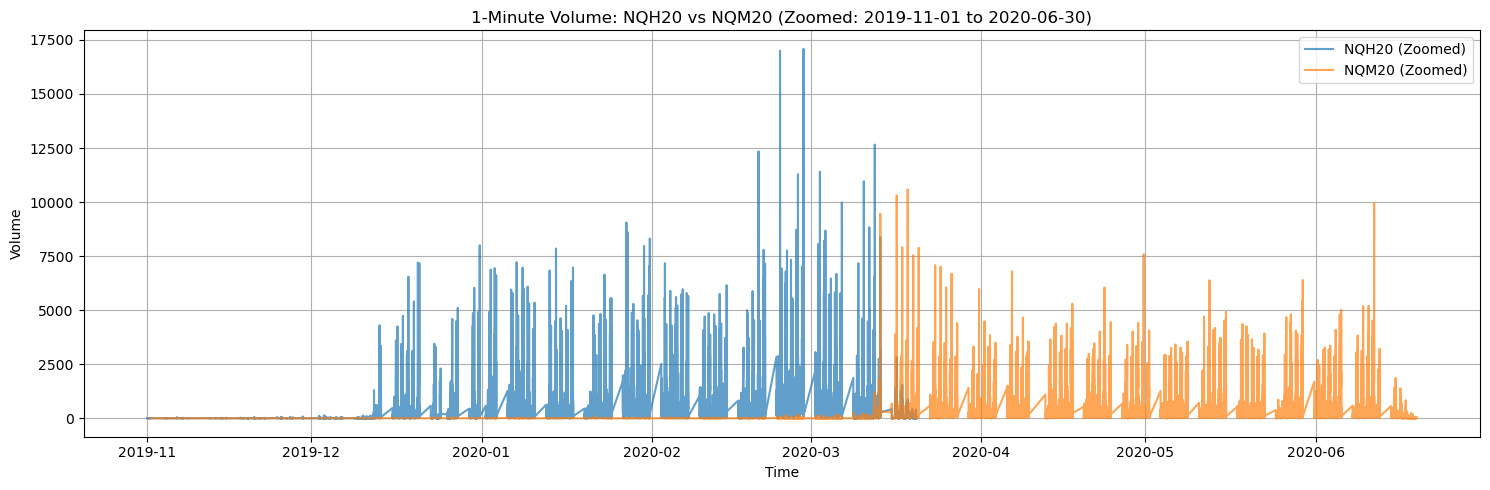

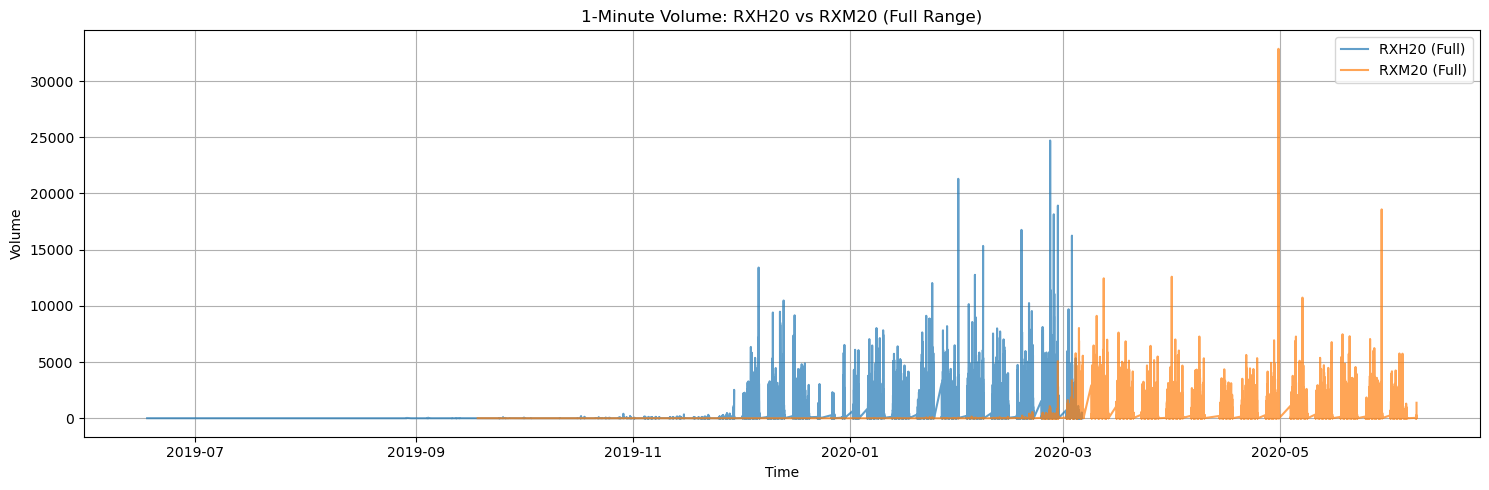

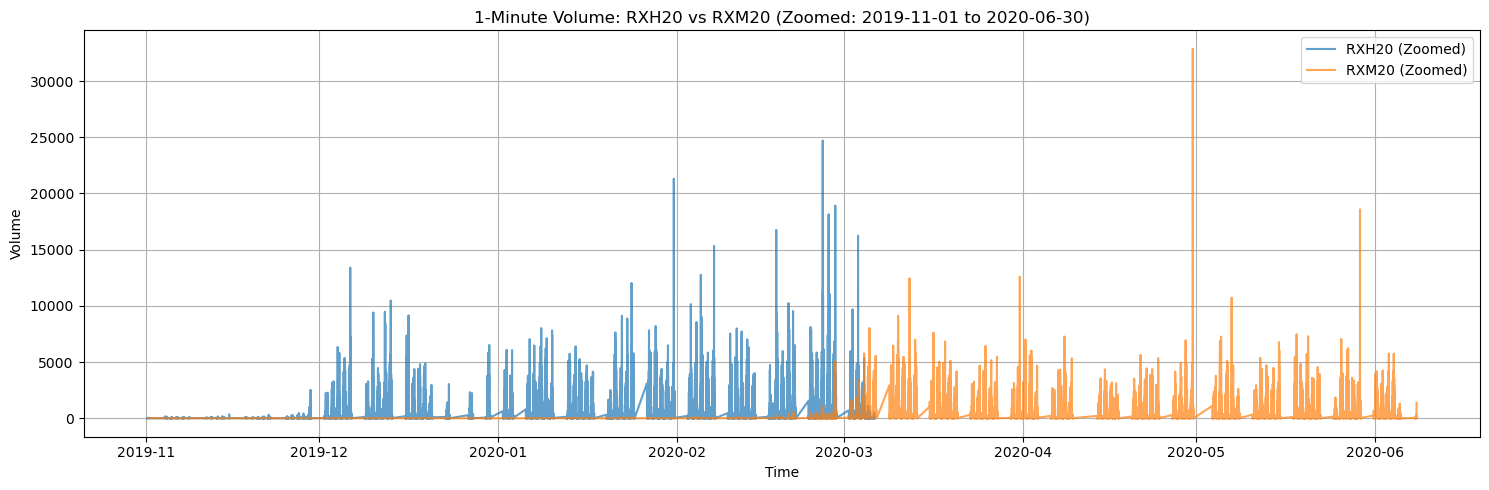

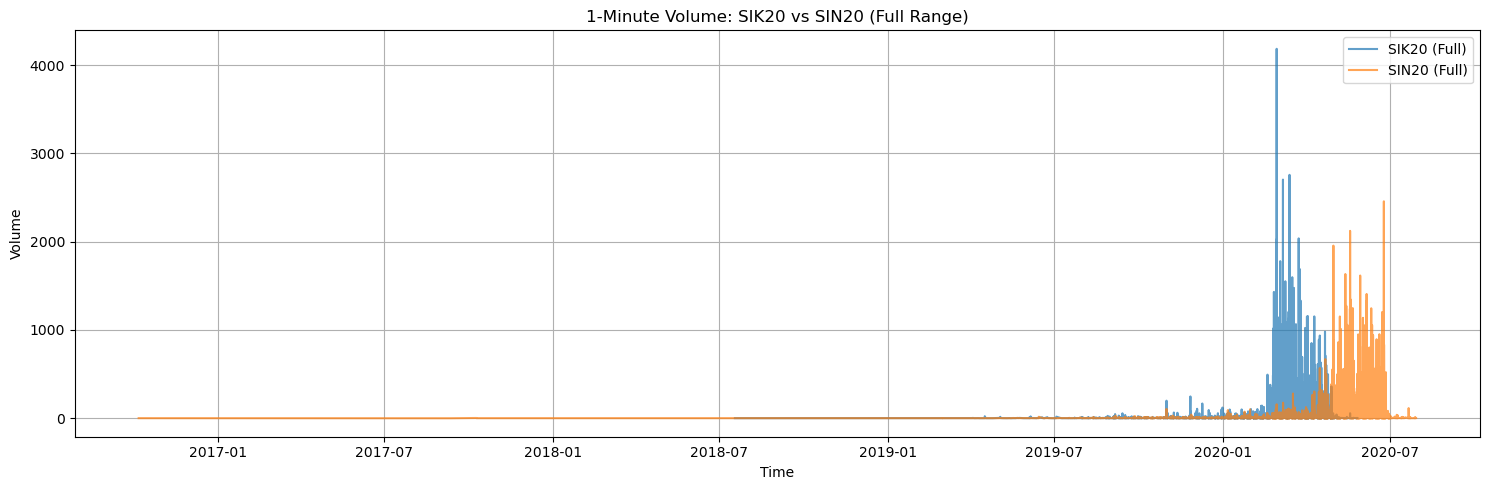

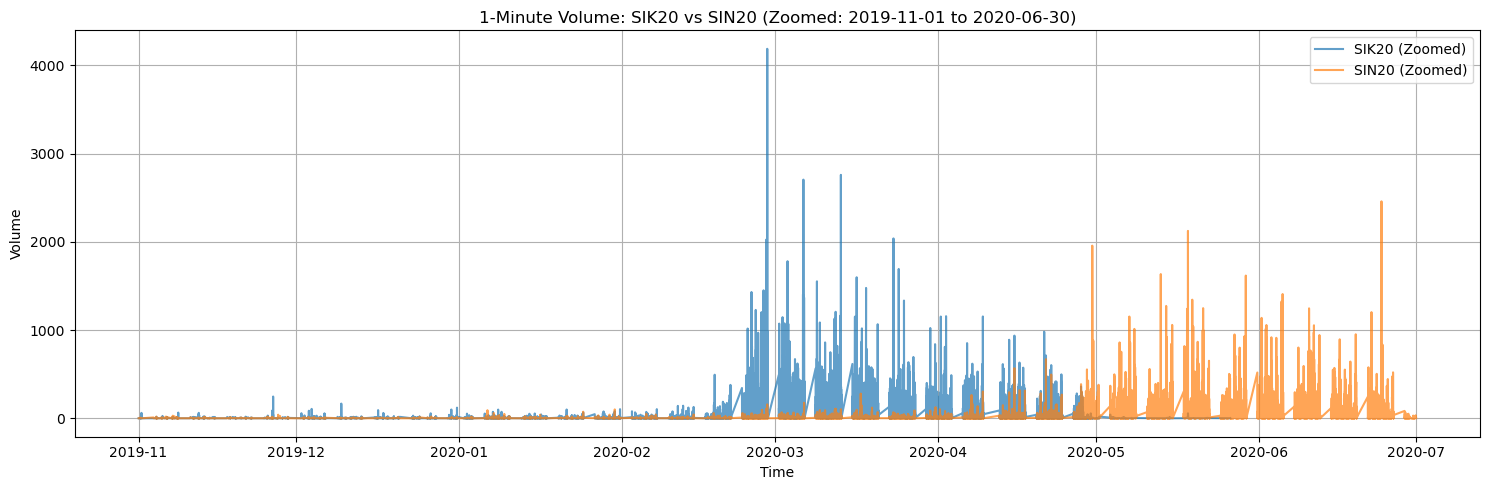

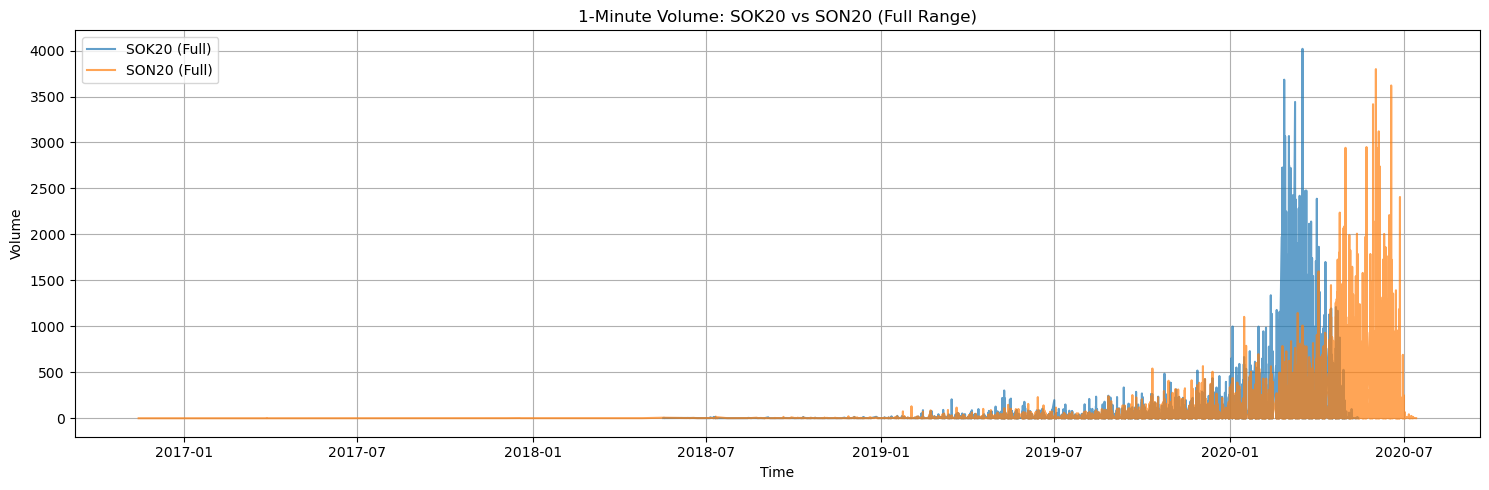

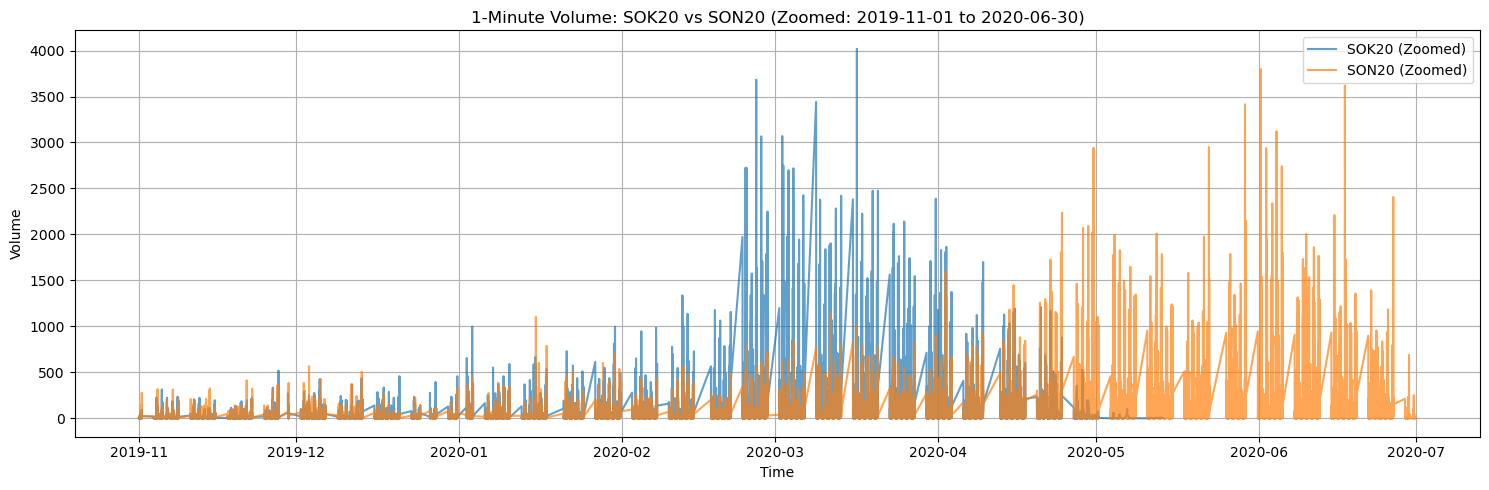

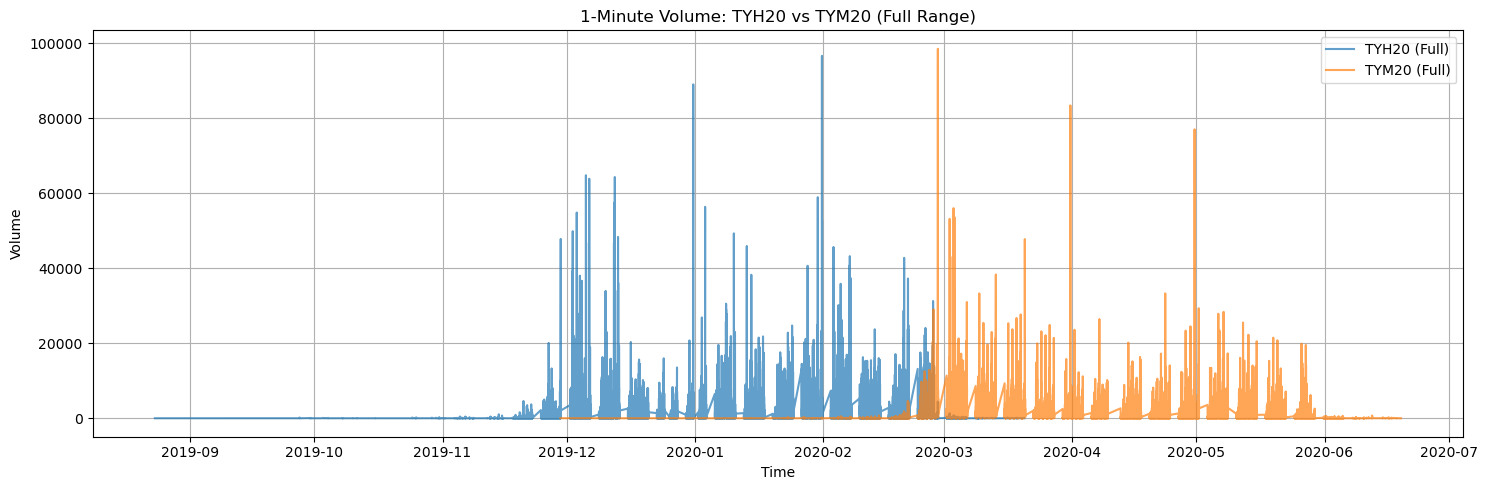

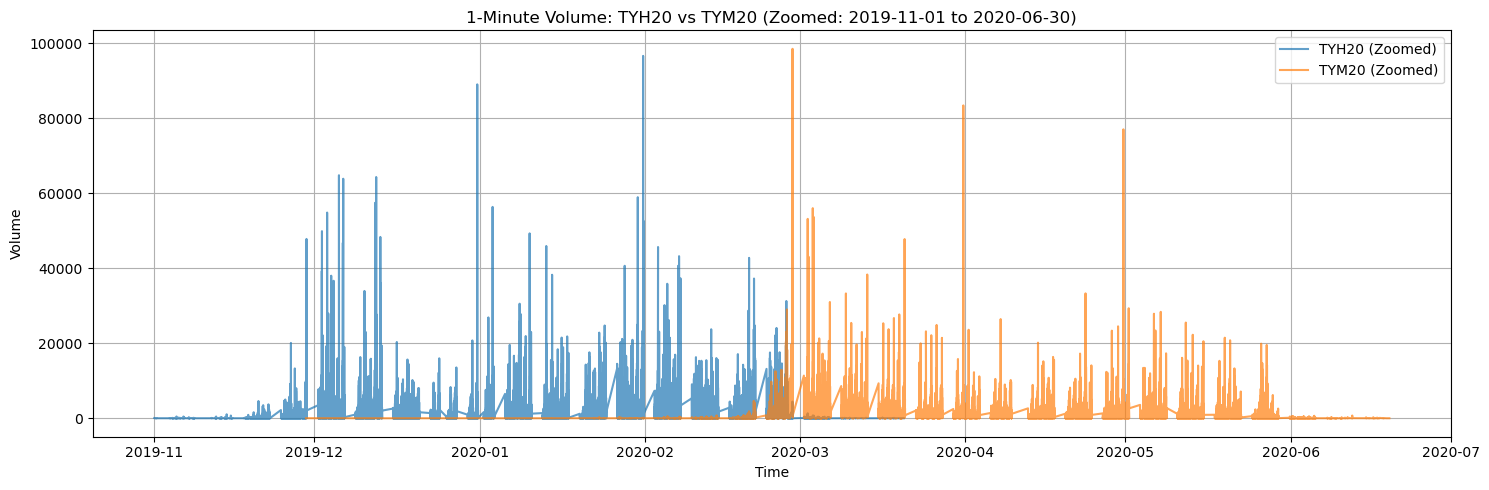

In [11]:
def plot_volume_for_pairs(data_folder, date_format='%Y.%m.%d.%H:%M:%S', zoom_start='2019-11-01', zoom_end='2020-06-30'):
    all_files = os.listdir(data_folder)
    roots = sorted(set(f[:2] for f in all_files if f.endswith('.csv')))

    # Define custom expiry month codes if needed
    contract_map = {
        'CL': ('K20', 'M20'),
        'SO': ('K20', 'N20'), 
        'GC': ('J20', 'M20'),
        'SI': ('K20', 'N20'),
        'HG': ('K20', 'N20'),     
    }

    for root in roots:
        month1, month2 = contract_map.get(root, ('H20', 'M20'))  # fallback default
        file1 = f"{root}{month1}.csv"
        file2 = f"{root}{month2}.csv"

        path1 = os.path.join(data_folder, file1)
        path2 = os.path.join(data_folder, file2)

        if not (os.path.exists(path1) and os.path.exists(path2)):
            print(f"Skipping {root}: Missing {file1} or {file2}")
            continue

        df1 = pd.read_csv(path1, header=None, names=['datetime', 'open', 'high', 'low', 'close', 'volume'])
        df2 = pd.read_csv(path2, header=None, names=['datetime', 'open', 'high', 'low', 'close', 'volume'])

        df1['datetime'] = pd.to_datetime(df1['datetime'], format=date_format, errors='coerce')
        df2['datetime'] = pd.to_datetime(df2['datetime'], format=date_format, errors='coerce')
        df1 = df1.dropna(subset=['datetime']).set_index('datetime')
        df2 = df2.dropna(subset=['datetime']).set_index('datetime')

        # FULL-RANGE PLOT 
        plt.figure(figsize=(15, 5))
        plt.plot(df1['volume'], label=f'{root}{month1} (Full)', alpha=0.7)
        plt.plot(df2['volume'], label=f'{root}{month2} (Full)', alpha=0.7)
        plt.title(f'1-Minute Volume: {root}{month1} vs {root}{month2} (Full Range)')
        plt.xlabel('Time')
        plt.ylabel('Volume')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()

        # ZOOMED-IN PLOT
        df1_zoom = df1.loc[zoom_start:zoom_end]
        df2_zoom = df2.loc[zoom_start:zoom_end]

        plt.figure(figsize=(15, 5))
        plt.plot(df1_zoom['volume'], label=f'{root}{month1} (Zoomed)', alpha=0.7)
        plt.plot(df2_zoom['volume'], label=f'{root}{month2} (Zoomed)', alpha=0.7)
        plt.title(f'1-Minute Volume: {root}{month1} vs {root}{month2} (Zoomed: {zoom_start} to {zoom_end})')
        plt.xlabel('Time')
        plt.ylabel('Volume')
        plt.legend()
        plt.grid(True)
        plt.tight_layout()
        plt.show()


plot_volume_for_pairs(r"C:\Users\Zery Chan\Downloads\Project")


CL

Start: 2020-03-05 (CLK20), Cutoff: 2020-04-18, End: 2020-05-14 (CLM20)

ECH

Start: 2019-12-11 (ECH20), Cutoff: 2020-03-13, End: 2020-05-31 (ECM20)

ESH

Start: 2019-12-11 (ESH20), Cutoff: 2020-03-13, End: 2020-05-31 (ESM20)

GC

Start: 2020-01-25 (GCJ20), Cutoff: 2020-03-25, End: 2020-05-26 (GCM20)

HG

Start: 2020-02-21 (HGK20), Cutoff: 2020-04-27, End: 2020-06-25 (HGN20)

NQ 

Start: 2019-12-12 (NQH20), Cutoff: 2020-03-13, End: 2020-06-17 (NGM20)

RX 

Start: 2019-12-01 (RXH20), Cutoff: 2020-03-05, End: 2020-06-04 (RXM20)

SI: 

Start: 2020-02-23 (SIK20), Cutoff: 2020-04-27, End: 2020-06-26 (SIN20)

S: 

Start: 2020-01-01 (SK20), Cutoff: 2020-04-14, End: 2020-06-26 (SN20)

TY: 

Start: 2019-11-25 (TYH20), Cutoff: 2020-02-26, End: 2020-05-29 (TYM20)

In [18]:
# Define expected trading minutes per day (rounded to 23h = 1380 min)
expected_minutes = {
    'CL': 1380,  # Crude Oil: 23h/day (CME/NYMEX, 6PM–5PM ET)
    'EC': 1380,  # EUR/USD: 23h/day (CME, 6PM–5PM ET)
    'ES': 1380,  # S&P 500 E-mini: 23h/day (CME, 6PM–5PM ET)
    'GC': 1380,  # Gold: 23h/day (COMEX, 6PM–5PM ET)
    'HG': 1380,  # Copper: 23h/day (COMEX, 6PM–5PM ET)
    'NQ': 1380,  # Nasdaq E-mini: 23h/day (CME, 6PM–5PM ET)
    'RX': 720,   # German Bund: ~12h/day (Eurex, ~1AM–1PM ET)
    'SI': 1380,  # Silver: 23h/day (COMEX, 6PM–5PM ET)
    'SO': 880,   # Soybeans: ~14.5h/day (CBOT, ~8PM–2:20PM ET + break)
    'TY': 1380   # 10Y T-Note: 23h/day (CBOT, 6PM–5PM ET)
}

# === Date boundaries for merging contracts ===
date_ranges = {
    'CL':  ('2020-03-05', '2020-04-18', '2020-05-14'),
    'EC':  ('2019-12-11', '2020-03-13', '2020-05-31'),
    'ES':  ('2019-12-11', '2020-03-13', '2020-05-31'),
    'GC':  ('2020-01-25', '2020-03-25', '2020-05-26'),
    'HG':  ('2020-02-21', '2020-04-27', '2020-06-25'),
    'NQ':  ('2019-12-12', '2020-03-13', '2020-06-17'),
    'RX':  ('2019-12-01', '2020-03-05', '2020-06-04'),
    'SI':  ('2020-02-23', '2020-04-27', '2020-06-26'),
    'SO':  ('2020-01-01', '2020-04-14', '2020-06-26'),
    'TY':  ('2019-11-25', '2020-02-26', '2020-05-29'),
}

# === Contract expiry codes per symbol ===
month_codes = {
    'CL':  ('K20

# Define start, cutoff, and end dates
date_ranges = {
    'CL':  ('2020-03-05', '2020-04-18', '2020-05-14'),
    'EC': ('2019-12-11', '2020-03-13', '2020-05-31'),
    'ES': ('2019-12-11', '2020-03-13', '2020-05-31'),
    'GC':  ('2020-01-25', '2020-03-25', '2020-05-26'),
    'HG':  ('2020-02-21', '2020-04-27', '2020-06-25'),
    'NQ':  ('2019-12-12', '2020-03-13', '2020-06-17'),
    'RX':  ('2019-12-01', '2020-03-05', '2020-06-04'),
    'SI':  ('2020-02-23', '2020-04-27', '2020-06-26'),
    'SO':  ('2020-01-01', '2020-04-14', '2020-06-26'),
    'TY':  ('2019-11-25', '2020-02-26', '2020-05-29'),
}

# Define contract month codes per symbol
month_codes = {
    'CL':  ('K20', 'M20'), 'EC': ('H20', 'M20'), 'ES': ('H20', 'M20'),
    'GC':  ('J20', 'M20'), 'HG': ('K20', 'N20'), 'NQ': ('H20', 'M20'),
    'RX':  ('H20', 'M20'), 'SI': ('K20', 'N20'), 'SO': ('K20', 'N20'),
    'TY':  ('H20', 'M20')
}

# Merging and cleaning function with custom completeness threshold
def merge_contracts(symbol, start, cutoff, end, folder, date_format='%Y.%m.%d.%H:%M:%S'):
    month1, month2 = month_codes[symbol]
    file1 = f"{symbol}{month1}.csv"
    file2 = f"{symbol}{month2}.csv"
    file1_path = os.path.join(folder, file1)
    file2_path = os.path.join(folder, file2)

    if not (os.path.exists(file1_path) and os.path.exists(file2_path)):
        print(f"Missing files for {symbol}")
        return None

    df1 = pd.read_csv(file1_path, header=None, names=['datetime', 'open', 'high', 'low', 'close', 'volume'])
    df2 = pd.read_csv(file2_path, header=None, names=['datetime', 'open', 'high', 'low', 'close', 'volume'])

    df1['datetime'] = pd.to_datetime(df1['datetime'], format=date_format, errors='coerce')
    df2['datetime'] = pd.to_datetime(df2['datetime'], format=date_format, errors='coerce')
    df1 = df1.dropna(subset=['datetime']).set_index('datetime')
    df2 = df2.dropna(subset=['datetime']).set_index('datetime')

    # Slice using the given date ranges
    df1 = df1.loc[start:cutoff]
    df2 = df2.loc[pd.to_datetime(cutoff) + pd.Timedelta(minutes=1):end]
    df = pd.concat([df1, df2]).sort_index()

    # Filter by per-symbol 90% threshold
    df['date'] = df.index.date
    daily_counts = df.groupby('date').size()
    min_required = int(0.9 * expected_minutes[symbol])
    valid_dates = daily_counts[daily_counts >= min_required].index
    df = df[df['date'].isin(valid_dates)].drop(columns='date')

    # Print summary
    print(f"\n {symbol}: {len(df)} rows | From {df.index.min().date()} to {df.index.max().date()} (Min {min_required} min/day)")
    print(df.head(15))  # Preview first 15 rows

    return df

# Run all 10 futures with symbol-specific filtering
data_folder = r"C:\Users\Zery Chan\Downloads\Project"

merged_futures = {}
for symbol, (start, cutoff, end) in date_ranges.items():
    merged_futures[symbol] = merge_contracts(symbol, start, cutoff, end, data_folder)


 CL: 54752 rows | From 2020-03-05 to 2020-05-14 (Min 1242 min/day)
                      open   high    low  close  volume
datetime                                               
2020-03-05 00:00:00  47.45  47.45  47.45  47.45       2
2020-03-05 00:01:00  47.45  47.45  47.45  47.45       2
2020-03-05 00:02:00  47.47  47.47  47.46  47.46      33
2020-03-05 00:03:00  47.45  47.45  47.42  47.43      53
2020-03-05 00:04:00  47.43  47.44  47.43  47.44       3
2020-03-05 00:05:00  47.45  47.45  47.44  47.44       3
2020-03-05 00:06:00  47.45  47.45  47.45  47.45       4
2020-03-05 00:07:00  47.44  47.44  47.43  47.43       2
2020-03-05 00:08:00  47.45  47.45  47.45  47.45       2
2020-03-05 00:09:00  47.45  47.45  47.45  47.45       1
2020-03-05 00:11:00  47.46  47.46  47.46  47.46       2
2020-03-05 00:12:00  47.48  47.51  47.48  47.51       4
2020-03-05 00:13:00  47.53  47.53  47.51  47.52       4
2020-03-05 00:14:00  47.51  47.53  47.51  47.53       2
2020-03-05 00:15:00  47.52  47.54  4


 SO: 64847 rows | From 2020-02-18 to 2020-06-22 (Min 792 min/day)
                       open    high     low   close  volume
datetime                                                   
2020-02-18 00:00:00  904.50  904.50  904.50  904.50      43
2020-02-18 00:01:00  904.50  904.50  904.50  904.50      23
2020-02-18 00:02:00  904.50  904.50  904.50  904.50       1
2020-02-18 00:05:00  904.50  904.75  904.50  904.75      30
2020-02-18 00:06:00  905.00  905.00  904.75  904.75      79
2020-02-18 00:07:00  904.75  904.75  904.75  904.75       2
2020-02-18 00:08:00  904.75  904.75  904.75  904.75       3
2020-02-18 00:10:00  904.50  904.50  904.50  904.50       4
2020-02-18 00:13:00  904.75  905.00  904.75  905.00      46
2020-02-18 00:14:00  905.00  905.00  905.00  905.00       7
2020-02-18 00:15:00  905.00  905.00  905.00  905.00      10
2020-02-18 00:16:00  905.00  905.00  905.00  905.00       1
2020-02-18 00:17:00  905.00  905.00  905.00  905.00       1
2020-02-18 00:18:00  905.00  905.